In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# print(plt.style.available)

In [2]:
import os
import matplotlib as mpl

# print(mpl.get_configdir())

styles_dir = os.path.join(mpl.get_configdir(), 'stylelib')

if not os.path.exists(styles_dir):
    os.makedirs(styles_dir)

stylesheet_name = 'CHANGEME'
style_file = os.path.join(
    styles_dir, '{}.mplstyle'.format(stylesheet_name))

In [3]:
white = 'ffffff'
black = '000000'
dark = '222222'
light = 'cccccc'
cycle = ['a6cee3', '1f78b4', 'b2df8a', '33a02c', 'fb9a99', 'e31a1c', 
         'fdbf6f', 'ff7f00', 'cab2d6', '6a3d9a', 'ffff99', 'b15928']
# cycle = ['a6cee3', '1f78b4', 'b2df8a', '33a02c', 'fb9a99', 'e31a1c', 
#          'fdbf6f', 'ff7f00', 'cab2d6', '6a3d9a', ]

In [4]:
styles = dict(
    axes=dict(
        facecolor=white,
        edgecolor=black,
        linewidth=.8,
        grid=True,
        titlesize='medium',
        titlepad=6,
        labelsize='small',
        labelpad=4,
        labelweight='normal',
        labelcolor=dark,
        axisbelow='line',
        unicode_minus=True,
        xmargin=.1,
        ymargin=.1,
        formatter=dict(
            limits=(-4, 4),
            use_locale=True,
            use_mathtext=True,
            useoffset=True,
            offset_threshold=4,
        ),
        spines=dict(
            left=False,
            bottom=False,
            right=False,
            top=False,
        )
    ),
    boxplot=dict(
        notch=False,
        vertical=True,
        whiskers=1.5,
        bootstrap=None,
        patchartist=False,
        showmeans=False,
        showcaps=True,
        showbox=True,
        showfliers=True,
        meanline=False,
        flierprops=dict(
            color=dark,
            marker='o',
            markerfacecolor='none',
            markeredgecolor=dark,
            markersize=6,
            linestyle='none',
            linewidth=1.0,
        ),
        boxprops=dict(
            color=dark,
            linewidth=1.0,
            linestyle='-',
        ),
        whiskerprops=dict(
            color=dark,
            linewidth=1.0,
            linestyle='-',
        ),
        capprops=dict(
            color=dark,
            linewidth=1.0,
            linestyle='-',
        ),
        medianprops=dict(
            color='C1',
            linewidth=1.0,
            linestyle='-',
        ),
        meanprops=dict(
            color='C2',
            marker='^',
            markerfacecolor='C2',
            markeredgecolor='C2',
            markersize=6,
            linestyle='none',
            linewidth=1.0,
        ),
    ),
    figure=dict(
        titlesize='medium',
        titleweight='bold',
        dpi=100,
        facecolor=white,
        edgecolor=white,
        autolayout=True,
    ),
    font=dict(
        family='sans-serif',
        style='normal',
        variant='normal',
        weight='medium',
        stretch='normal',
        size=10,
        serif=('Charter', 'Sitka', 'serif'),
        monospace=('Consolas', 'Bitstream Vera Sans Mono', 
                   'Andale Mono', 'monospace'),
    ),
    grid=dict(
        color=light,
        linestyle='-',
        linewidth=.3,
        alpha=.6,
    ),
    hatch=dict(
        color=dark,
        linewidth=.75,
    ),
    legend=dict(
        loc='best',
        frameon=False,
        framealpha=.2,
        facecolor='inherit',
        edgecolor=white,
        fancybox=False,
        shadow=False,
        numpoints=1,
        scatterpoints=1,
        markerscale=1,
        fontsize='medium',
        borderpad=.5,
        labelspacing=.5,
        handlelength=2.0,
        handleheight=.7,
        handletextpad=.9,
        borderaxespad=.5,
        columnspacing=2,
    ),
    lines=dict(
        linewidth=.5,
        linestyle='-',
        markeredgewidth=0,
        markersize=3,
        dash_joinstyle='round',
        dash_capstyle='round',
        solid_joinstyle='round',
        solid_capstyle='round',
        antialiased=True,
        dashed_pattern=(2.8, 1.2),
        dashdot_pattern=(4.8, 1.2, 0.8, 1.2),
        dotted_pattern=(1.1, 1.1),
        scale_dashes=True,
    ),
    patch=dict(
        linewidth=0,
        edgecolor=dark,
        force_edgecolor=False,
        antialiased=True,
    ),
    savefig=dict(
        dpi=300,
        facecolor=white,
        edgecolor=white,
        format='svg',
        pad_inches=.125,
        jpeg_quality=100,
        transparent=True,
    ),
    xtick=dict(
        top=False,
        bottom=True,
        color=dark,
        labelsize='small',
        direction='in',
        major=dict(
            size=2,
            width=.8,
            pad=3.5,
            top=False,
            bottom=True,
        ),
        minor=dict(
            size=1.5,
            width=.8,
            pad=4,
            top=False,
            bottom=True,
            visible=False,
        ),
    ),
    ytick=dict(
        left=True,
        right=False,
        color=dark,
        labelsize='small',
        direction='in',
        major=dict(
            size=2,
            width=.8,
            pad=3.5,
            right=False,
            left=True,
        ),
        minor=dict(
            size=1.5,
            width=.8,
            pad=4,
            right=False,
            left=True,
            visible=False,
        ),
    ),
)

styles['font']['sans-serif'] = ('Verdana', 'sans-serif')

In [5]:
import collections


def flatten_dict(_d, pkey='', sep='.'):
    """Flatten nested dictionary keys into dot separated strings
    suitable for matplotlib stylesheet properties.
    """
    items = []
    for k, v in _d.items():
        nkey = pkey + sep + k if pkey else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten_dict(v, nkey, sep=sep).items())
        else:
            if type(v) in (list, tuple):
                v = ', '.join([str(x) for x in v])
            items.append((nkey, v))
    return dict(items)


# Write dictionary to file formatted for matplotlib stylesheet
with open(style_file, 'w') as f:
    # dict.values() is python3 only
    for k, v in flatten_dict(styles, '', '.').items():
        f.write('{}: {}\n'.format(k, v))

with open(style_file, 'a') as f:
    f.write(
        'axes.prop_cycle: cycler(\'color\', [{}])\n'.format(
            ', '.join(['\'{}\''.format(x) for x in cycle]))
    )

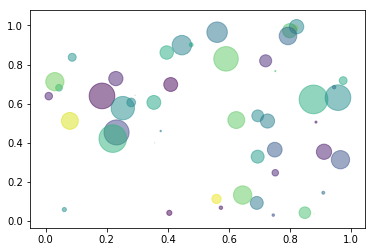

In [6]:
import numpy as np

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

/Users/nathanmatteson/.virtualenvs/datavis_bootcamp/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


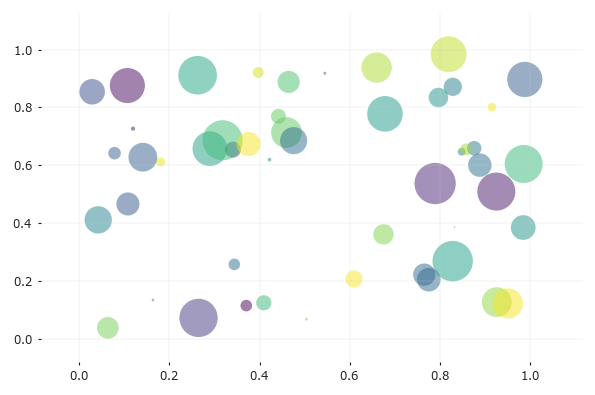

In [7]:
plt.style.use(stylesheet_name)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


In [8]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep',
 'CHANGEME']